# Cosmic muons

In [97]:
from IPython.display import set_matplotlib_formats
from myst_nb import glue
import matplotlib.font_manager
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams, cycler, colorbar
plt.ion()

plt.rcParams["svg.fonttype"] = "none"
# https://github.com/executablebooks/jupyter-book/issues/1429
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

cmap = plt.cm.viridis


def format_magnitude(magnitude, precision=3, units="", space=False):
    # List of magnitude prefixes
    prefixes = ["", "k", "M", "G", "T", "P", "E", "Z", "Y"]

    # Divide the magnitude by 1000 for each prefix
    for prefix in prefixes:
        if magnitude < 1E3:
            # If the magnitude is small enough, return the formatted string
            return f"{magnitude:10.{precision}f}{space*' '}{prefix}{units}"
        magnitude /= 1E3

    raise ValueError(f"Magnitude {magnitude} is too large")


# Create a FontProperties object with the desired font
font = matplotlib.font_manager.FontProperties(family='monospace', size=12)

# Set the font as the default font in the rcParams dictionary
matplotlib.rcParams['font.family'] = font.get_family()
matplotlib.rcParams['font.size'] = font.get_size()

plt.rcParams['figure.figsize'] = (8, 5)


$$
\frac{dI_{\mu}}{dE_{\mu}}
=
\frac{0.14}{\text{GeV} \text{ cm}^2 \text{ s} \text{ sr}}
\left( \frac{E_{\mu}}{\text{GeV}} \right)^{-2.7}
\left(
\frac{1}{1 + \frac{1.1 E_{\mu} \cos{\theta}}{115 \text{ GeV}}}
+
\frac{0.054}{1 + \frac{1.1 E_{\mu} \cos{\theta}}{850 \text{ GeV}}}
\right)
$$

In [98]:
def gaisser(energy: float, theta: float) -> float:
    return 0.14 * np.power(energy, -2.7) * (
        1 / (1 + 1.1 * energy * np.cos(theta) / 115.) +
        0.054 / (1 + 1.1 * energy * np.cos(theta) / 850.)
    )


def cosine_star(theta: float) -> float:
    p = (0.102573, -0.068287, 0.958633, 0.0407253, 0.817285)
    return np.sqrt((
        np.power(np.cos(theta), 2)
        + p[0] ** 2
        + p[1] * np.power(np.cos(theta), p[2])
        + p[3] * np.power(np.cos(theta), p[4])
    ) / (
        1 + p[0] ** 2 + p[1] + p[3]
    )
    )


def chirkin(energy: float, theta: float) -> float:
    return 0.14 * np.power(
        energy * (1 + 3.64 / (energy * np.power(cosine_star(theta), 1.29))), -2.7) * (
        1 / (1 + 1.1 * energy * cosine_star(theta) / 115.) +
        0.054 / (1 + 1.1 * energy * cosine_star(theta) / 850.)
    )


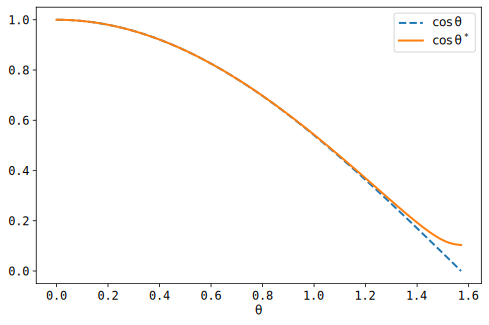

In [136]:
fig, ax = plt.subplots()

x = np.linspace(0, np.pi / 2, 100)

plt.plot(x, np.cos(x), label=r"$\cos{\theta}$", linewidth=2, linestyle="--")
plt.plot(x, cosine_star(x), label=r"$\cos{\theta}^*$", linewidth=2)

plt.xlabel(r"$\theta$")

plt.legend()
plt.show()

glue("muons_cosine_star", fig, display=False)


muons_gaisser_energy_varying_theta


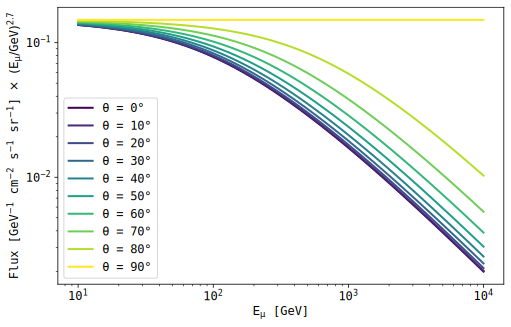

muons_chirkin_energy_varying_theta


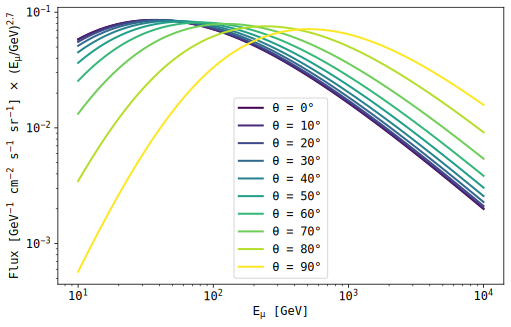

In [100]:

energy = np.logspace(1, 4, 1000)

for muon_formula, name in ((gaisser, "gaisser"), (chirkin, "chirkin")):
    fig, ax = plt.subplots()

    theta_range = np.arange(0, 100, 10) * np.pi / 180.
    for i, theta in enumerate(theta_range):
        plt.plot(energy, muon_formula(energy, theta) * energy ** 2.7,
                label=f"θ = {theta * 180 / np.pi:.0f}°", color=cmap(i / (len(theta_range) - 1)), linewidth=2)


    plt.yscale('log')
    plt.xscale('log')

    plt.xlabel(r"$E_{\mu}$ [GeV]")
    plt.ylabel(
       y_label := r"Flux [GeV$^{-1}$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$] $\times$ $({{E_{\mu}}}/$GeV$)^{2.7}$")

    plt.legend()
    s = f"muons_{name}_energy_varying_theta"
    print(s)

    plt.show()
    glue(s, fig, display=False)



muons_comparison_energy_varying_theta


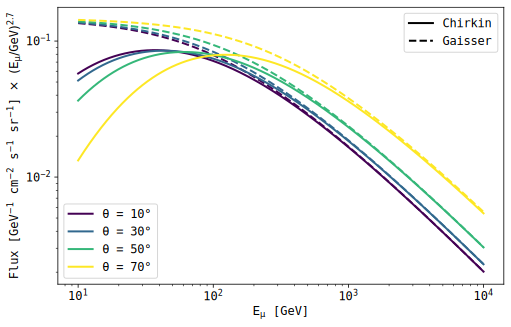

In [101]:
fig, ax = plt.subplots()

# compare the two models
theta_range = np.arange(10, 90, 20) * np.pi / 180.

for i, theta in enumerate(theta_range):
    plt.plot(energy, chirkin(energy, theta) * energy ** 2.7,
             label=f"θ = {theta * 180 / np.pi:.0f}°", color=cmap(i / (len(theta_range) - 1)), linewidth=2)
    plt.plot(energy, gaisser(energy, theta) * energy ** 2.7,
             label=f"θ = {theta * 180 / np.pi:.0f}°", color=cmap(i / (len(theta_range) - 1)), linewidth=2, linestyle="--")


plt.yscale('log')
plt.xscale('log')

plt.xlabel(r"$E_{\mu}$ [GeV]")
plt.ylabel(y_label)

plt.legend()

# manually define a legend for straight line and dashed line
line_type_legend = plt.legend([plt.Line2D([0], [0], color='black', lw=2),
                               plt.Line2D([0], [0], color='black', lw=2, linestyle="--")],
                              ['Chirkin', 'Gaisser'], loc='upper right')
# remove the legend from the plot

lines = plt.gca().get_lines()
legend1 = plt.legend([line for line in lines if line.get_linestyle() == '-'], [line.get_label()
                     for line in lines if line.get_linestyle() == '-'], loc='lower left')
matplotlib.pyplot.gca().add_artist(line_type_legend)
s = f"muons_comparison_energy_varying_theta"
print(s)

plt.show()
glue(s, fig, display=False)


muons_gaisser_theta_varying_energy


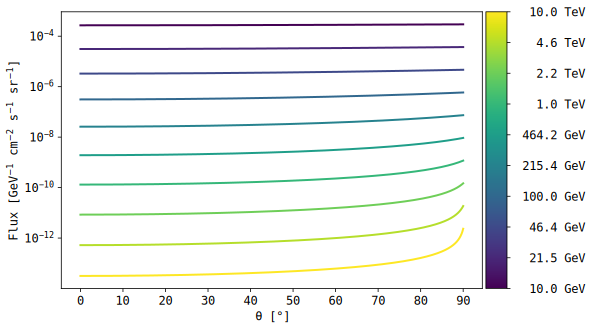

muons_chirkin_theta_varying_energy


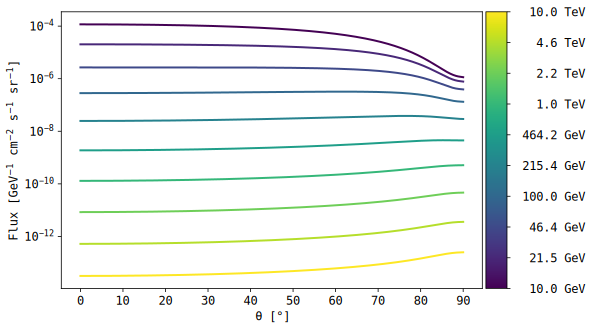

In [102]:
for muon_formula, name in ((gaisser, "gaisser"), (chirkin, "chirkin")):

    fig, ax = plt.subplots()

    energy_range = np.logspace(1, 4, 10)

    theta = np.linspace(0, 90, 1000) * np.pi / 180.
    for i, energy in enumerate(energy_range):
        plt.plot(theta * 180. / np.pi, muon_formula(energy, theta), label=f"E = {energy:.02f} GeV",
                color=cmap(i / (len(energy_range) - 1)), linewidth=2
                )

    plt.yscale('log')

    plt.xlabel(r"θ [°]")
    plt.ylabel(
        r"Flux [GeV$^{-1}$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")
    plt.xticks(np.arange(0, 100, 10))

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)
    cbar = colorbar.ColorbarBase(
        ax_cb, cmap=cmap, orientation='vertical')
    # manually set tick labels
    cbar.set_ticks(np.linspace(0, 1, len(energy_range)))
    # use energy_range to set tick labels
    cbar.set_ticklabels([format_magnitude(e * 1E9, precision=1, units="eV", space=True) for e in energy_range], ha="right")
    cbar.ax.yaxis.set_tick_params(pad=75)
    plt.gcf().add_axes(ax_cb)

    s = f"muons_{name}_theta_varying_energy"
    print(s)
    
    plt.show()

    glue(s, fig, display=False)


muons_comparison_theta_varying_energy


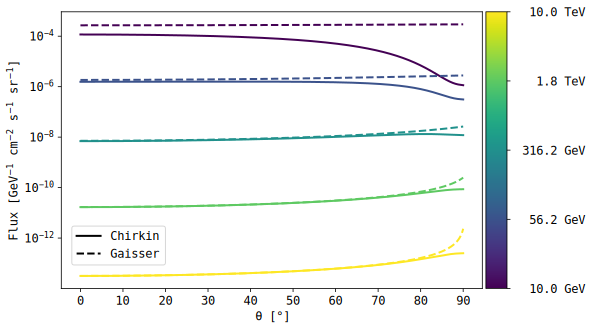

In [125]:

fig, ax = plt.subplots()

energy_range = np.logspace(1, 4, 5)

theta = np.linspace(0, 90, 1000) * np.pi / 180.
for i, energy in enumerate(energy_range):
    plt.plot(theta * 180. / np.pi, gaisser(energy, theta), label=f"E = {energy:.02f} GeV",
             color=cmap(i / (len(energy_range) - 1)), linewidth=2, linestyle="--")
    plt.plot(theta * 180. / np.pi, chirkin(energy, theta), label=f"E = {energy:.02f} GeV",
             color=cmap(i / (len(energy_range) - 1)), linewidth=2)

plt.yscale('log')

plt.xlabel(r"θ [°]")
plt.ylabel(
    r"Flux [GeV$^{-1}$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")
plt.xticks(np.arange(0, 100, 10))

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
cbar = colorbar.ColorbarBase(
    ax_cb, cmap=cmap, orientation='vertical')
# manually set tick labels
cbar.set_ticks(np.linspace(0, 1, len(energy_range)))
# use energy_range to set tick labels
cbar.set_ticklabels([format_magnitude(
    e * 1E9, precision=1, units="eV", space=True) for e in energy_range], ha="right")
cbar.ax.yaxis.set_tick_params(pad=75)

pos = ax.get_position()
plt.legend([plt.Line2D([0], [0], color='black', lw=2),
            plt.Line2D([0], [0], color='black', lw=2, linestyle="--")],
           ['Chirkin', 'Gaisser'], loc=(pos.x0 - 0.10, pos.y0 - 0.025))

plt.gcf().add_axes(ax_cb)

s = f"muons_comparison_theta_varying_energy"
print(s)

plt.show()

glue(s, fig, display=False)
